<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Inspection of a flow field

In this notebook we will inspect a pre-computed flow field. First, we will look at some of the field quantities and get some intuition for them. Then, we will look at some flow lines.

In [1]:
using Pkg
pkg"update"

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/darwindarak/PotentialFlow.jl.git`
  Updating git-repo `https://github.com/jdeldre/ViscousFlow.jl.git`
 Resolving package versions...
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Project.toml`
 [no changes]
  Updating `~/Dropbox/MAE150A/Julia/MAE150A/Manifest.toml`
  [3da002f7] ↓ ColorTypes v0.9.1 ⇒ v0.8.1
  [5ae59095] ↓ Colors v0.11.2 ⇒ v0.10.2


In [1]:
using MAE150A

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.2/MAE150A/A9IAL.ji for MAE150A [a017625c-406c-46ee-99d6-0fac6062339e]
└ @ Base loading.jl:1240


### Load the flow

We will use the flow from a pre-computed CFD solution. This is the steady state flow past a NACA 4415 airfoil at 5 degrees angle of attack at Reynolds number 1000.

In [2]:
state, f, sys, body = load_ns_solution("NACA4415_5deg.jld")

(Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208), [-24.0480699711476, -300.4266581053072, 15.046529429768954, -123.36551357673267, -101.8712115764923, -79.48660616476397, -89.91046838628681, -90.99256058314556, -86.1345742647908, -76.65558818188063  …  255.48686503586956, 223.44562048709784, 261.1309397378992, 214.80838260266964, 269.82700915887193, 200.1365994440282, 295.67441910764643, 164.88268357123016, 381.7373930783885, 382.53526401746376], Navier-Stokes system on a grid of size 504 x 208, Basic pointwise-specified body with 206 points
   Current position: (-0.5,0.0)
   Current angle (rad): -0.08726646259971647
)

Get the flow fields associated with the state: velocity, vorticity, and streamfunction

In [3]:
u, ω, ψ = get_flowfield(state,sys)

(Primal edges for a (nx = 504, ny = 208) cell grid of type Float64 data
  Internal u-faces: (nx = 504, ny = 207)
  Internal v-faces: (nx = 503, ny = 208), Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208), Dual nodes in a (nx = 504, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 504, ny = 208))

### Plotting the flow field

In [4]:
xg, yg = coordinates(ω,sys.grid)

(-1.0150000000000001:0.01:4.015, -1.035:0.01:1.035)

Plot the vorticity field

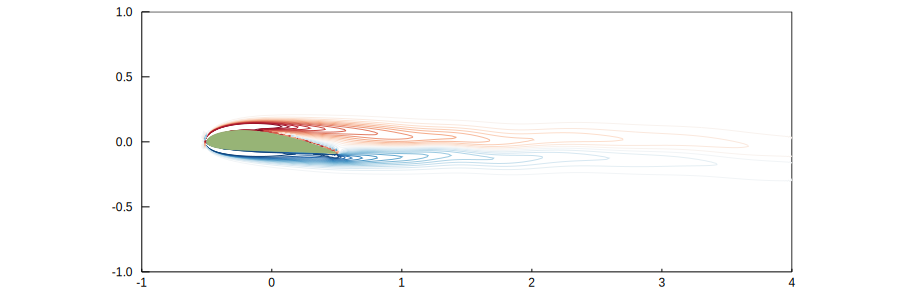

In [5]:
plot(xg,yg,ω,levels=range(-15,15,length=30), color = :RdBu,clim=(-15,15),ylim=(-1,1),xlim=(-1,4),size=(900,300))
plot!(body)

Plot the streamlines

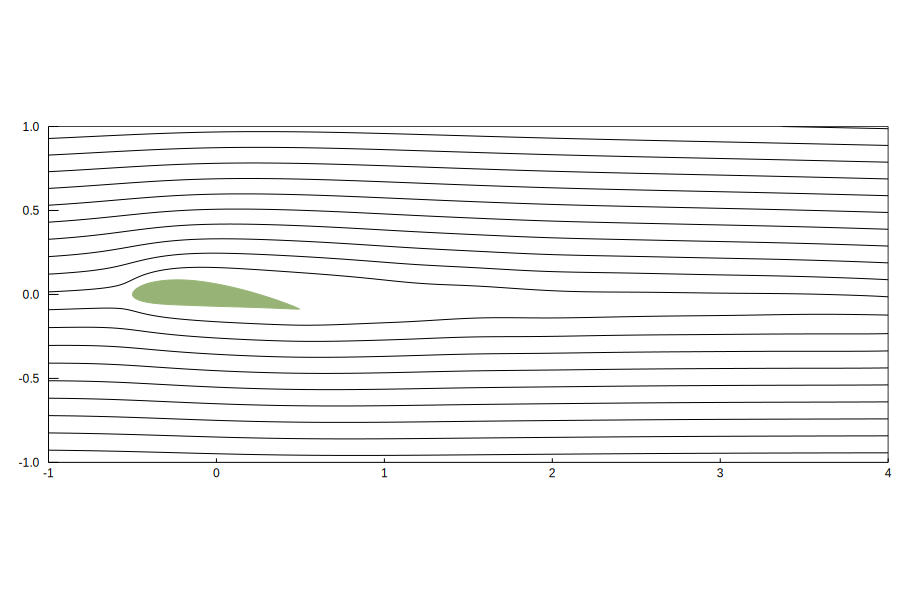

In [6]:
plot(xg,yg,ψ,levels=range(-1,2,length=31), color = :black, ylim = (-1,1),xlim = (-1,4),size=(900,600))
plot!(body)

Plot the velocity field components

In [7]:
xue, yue, xve, yve = coordinates(u,sys.grid)

(-1.0150000000000001:0.01:4.015, -1.03:0.01:1.03, -1.01:0.01:4.01, -1.035:0.01:1.035)

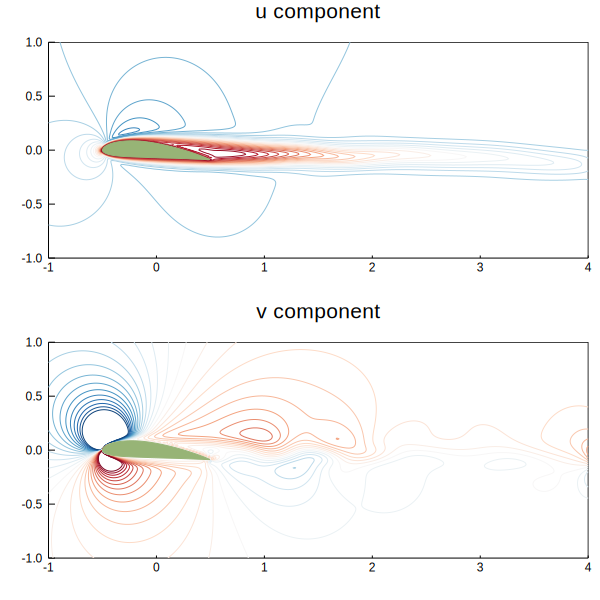

In [8]:
ps1 = plot(xue,yue,u.u,levels=range(-0.1,1.5,length=31), color = :RdBu,clim=(-0.1,1.5),
    ylim=(-1,1),xlim=(-1,4),title="u component")
plot!(ps1,body)
ps2 = plot(xve,yve,u.v,levels=range(-0.15,0.15,length=31), color = :RdBu,clim=(-0.15,0.15),
    ylim=(-1,1),xlim=(-1,4),title="v component")
plot!(ps2,body)
plot(ps1,ps2,layout=(2,1),size=(600,600))

### Flow lines

First, we need to generate an interpolatable form of the velocity field

In [9]:
ufield, vfield = interpolatable_field(u,sys.grid);

#### Trajectory of a particle

In [10]:
# Initial location of the particle
x0 = (-1.0,0)

# Time range of the trajectory
Tmax = 5.0

# Time step size
Δt = 0.001

# Compute the trajectory...
sol = compute_trajectory(ufield,vfield,x0,Tmax,Δt);

Plot the trajectory

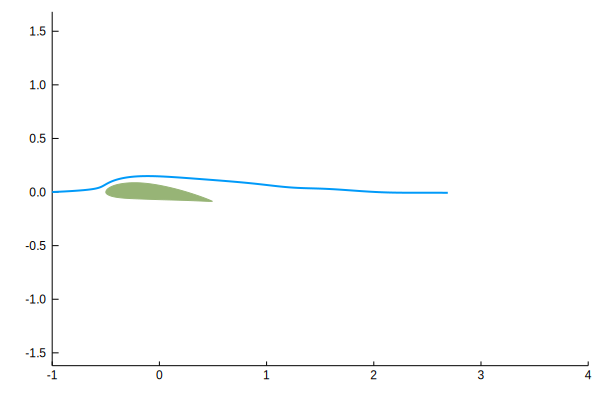

In [11]:
plot(sol[1,:],sol[2,:],linewidth=2,xlim=(-1,4))
plot!(body)

Evaluate the velocity along the trajectory

In [12]:
utraj = []
vtraj = []
for u in sol.u
    push!(utraj,ufield(u...))
    push!(vtraj,vfield(u...))
end

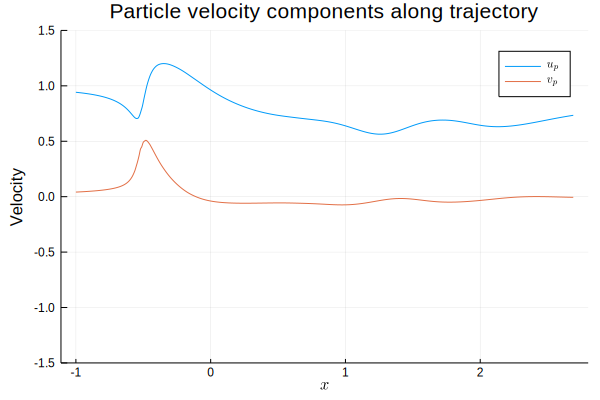

In [13]:
plot(sol[1,:],utraj,ylim=(0,1.5),xlabel=L"x",label=L"u_p",title="Particle velocity components along trajectory")
plot!(sol[1,:],vtraj,ylim=(-1.5,1.5),label=L"v_p",ylabel="Velocity")